In [1]:
## START WİTH MODEL
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths


### Data exploration

In [2]:
import os 
os.getcwd()

'C:\\Users\\MERT\\Desktop\\MERT -OPENCV\\Project-MAİN'

In [3]:
def display_img(img):
    plt.imshow(img, clim=(0.064, 0.068))
    

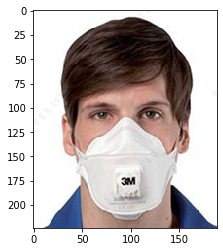

In [4]:
mask_example = plt.imread("Mask_Datasets2/Train/Mask/3.PNG")
display_img(mask_example)

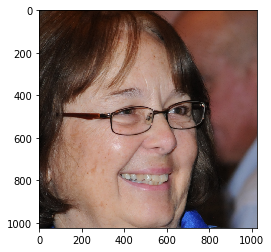

In [5]:
no_mask_example = plt.imread("Mask_Datasets2/Train/No_mask/15405.png")
display_img(no_mask_example)

In [6]:
no_mask_example.shape

(1024, 1024, 3)

In [7]:
mask_example.shape

(224, 189, 4)

### AS you can see merto there are different sizes.

In [11]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

imagePaths = list(paths.list_images("Mask_Datasets2"))
data = [] 
labels = [] 

for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        labels.append(label)

In [12]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


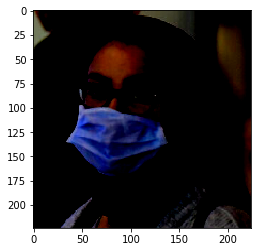

In [13]:
plt.imshow(data[1])


### Labellar için one hot encoding 


In [14]:
from sklearn import preprocessing
from keras.utils import to_categorical

In [15]:
lb = preprocessing.LabelBinarizer()

labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [18]:
labels.shape
if labels[1] == label[1]:
    print("1")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


### Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size = 0.20 , random_state = 7)

### Data augmentation için 

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

### IMAGE NET 

-> mobilenetv2 -fine tuning

1-önceden eğitilmiş Imagenet Weightsleriyle load etcem  ama networkun başındaki Ful coneccted layerleri nı keserek

2-yeni fully connected layer oluşturup onu eklicem

3-networkun base leyerslarını dondurcaz ,weightler backpropagation sırasında güncelenmicek  ama headlayers lar tune edilmiş olıcak .Amacımız buydu zaten 


In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [19]:

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

convModel = baseModel.output
convModel = AveragePooling2D(pool_size=(7, 7))(convModel)
convModel = Flatten(name="flatten")(convModel)
convModel = Dense(128, activation="relu")(convModel)
convModel = Dropout(0.5)(convModel)
convModel = Dense(2, activation="softmax")(convModel)

model = Model(inputs=baseModel.input, outputs=convModel)


for layer in baseModel.layers:
    layer.trainable = False

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


### ŞİMDİ HEAD OF NETWORK U TRAİN EDİCEZ TUNE ETMİŞTİK

In [20]:
from tensorflow.keras.optimizers import Adam

In [42]:

initial_lr = 1e-5
epochs = 25
batch_size =32

opt = Adam(lr=initial_lr, decay=initial_lr / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit(
    image_gen.flow(x_train, y_train , batch_size=batch_size),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=epochs)

Train for 27 steps, validate on 220 samples
Epoch 1/25
27/27 [==============================] - 45s 2s/step - loss: 0.7086 - accuracy: 0.6120 - val_loss: 0.6082 - val_accuracy: 0.5938
Epoch 2/25
27/27 [==============================] - 42s 2s/step - loss: 0.4484 - accuracy: 0.7925 - val_loss: 0.5431 - val_accuracy: 0.6406
Epoch 3/25
27/27 [==============================] - 41s 2s/step - loss: 0.3628 - accuracy: 0.8455 - val_loss: 0.4675 - val_accuracy: 0.6927
Epoch 4/25
27/27 [==============================] - 41s 2s/step - loss: 0.2979 - accuracy: 0.8821 - val_loss: 0.3931 - val_accuracy: 0.7656
Epoch 5/25
27/27 [==============================] - 42s 2s/step - loss: 0.2388 - accuracy: 0.9151 - val_loss: 0.3624 - val_accuracy: 0.7812
Epoch 6/25
27/27 [==============================] - 42s 2s/step - loss: 0.2154 - accuracy: 0.9116 - val_loss: 0.3406 - val_accuracy: 0.8021
Epoch 7/25
27/27 [==============================] - 42s 2s/step - loss: 0.1956 - accuracy: 0.9292 - val_loss: 0.3105

In [45]:
from sklearn.metrics import classification_report ,accuracy_score

In [65]:
predict = model.predict(x_test , batch_size=batch_size)
predict = np.argmax(predict ,axis =1)

print(classification_report(y_test.argmax(axis =1) , predict , target_names =lb.classes_))
print()



              precision    recall  f1-score   support

        Mask       0.86      0.97      0.91       103
     No_mask       0.97      0.86      0.91       117

    accuracy                           0.91       220
   macro avg       0.92      0.92      0.91       220
weighted avg       0.92      0.91      0.91       220


0.9136363636363637


In [66]:
print(accuracy_score(y_test.argmax(axis = 1 ) , predict))


0.9136363636363637


In [55]:
model.save("training_model.h5")

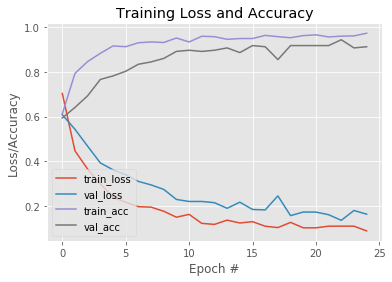

In [67]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()